# NURBS for geometry and mesh generation

In this demo you will learn about NURBS for geometry and mesh generation. Several examples illustrate how B-splines are recursively generated, what their properties are, and how to use them to create parameterized curves. The fundamental operations of knot insertion and degree elevation, the CAD analogue of h- and p- refinement in FEA, are discussed. Their combination leads to the concept of k-refinement, for which their is no analogue in FEA. Using repeated knot insertion a curve can be decomposed into its Bezier segments, a process called Bezier decomposition, which shall prove very useful in analysis. 

Non-uniform rational B-splines (NURBS), a generalization of B-splines that allow the modeling of conic sections, represent the de facto standard technology in CAD. While NURBS are rational functions, instead of polynomials, all usefull properties and operations on B-splines translate easily to NURBS. The properties that make NURBS useful for design also make them usefull in analysis. We shall see this in a following demo in which we discuss NURBS based isogeometric analysis of 2D linear elasticity.

## Set path, compile and load libraries

In [2]:
path = pwd()                                         # current path
push!(LOAD_PATH, path, string(path,"/functions"))    # addpath library path
# Pkg.build("PyPlot")                                # run this command the first time you use this demo
using PyPlot, Curves                                 # load plotting utilities

## Some tips and tricks in Julia

The environment you are looking at is called Interactive Julia, or simply IJulia. There are different cells, some with text in Markdown, and some with code. To run a cell, go to the specific cell and press ther run cell button on the top, or 'control-return'. Below follow some useful commands. For further information about Julia see, http://julialang.org, http://docs.julialang.org/en/release-0.4/, https://github.com/JuliaLang/IJulia.jl

You can use autocompletion by using the tab-command. 

If you want to know what the input is of a specific function you can use the command 'method("function")'. This will also give you a hyperlink to the specific piece of code which is on GitHub. See the following example:

In [26]:
methods(linspace)

# 6 methods for generic function "linspace":
linspace{T<:AbstractFloat}(start::T<:AbstractFloat, stop::T<:AbstractFloat, len::T<:AbstractFloat) at range.jl:183
linspace{T<:AbstractFloat}(start::T<:AbstractFloat, stop::T<:AbstractFloat, len::Real) at range.jl:230
linspace(start::Real, stop::Real) at range.jl:234
linspace(start::Real, stop::Real, len::Real) at range.jl:234
linspace{T<:ColorTypes.Color{T,N}}(c1::T<:ColorTypes.Color{T,N}, c2::T<:ColorTypes.Color{T,N}) at /Users/rene/.julia/v0.4/Colors/src/utilities.jl:63
linspace{T<:ColorTypes.Color{T,N}}(c1::T<:ColorTypes.Color{T,N}, c2::T<:ColorTypes.Color{T,N}, n) at /Users/rene/.julia/v0.4/Colors/src/utilities.jl:63

Julia chooses the specific implementation or method of a function based on its input, a feature called `multiple dispatch'. If you want to see which specific method is chosen based on its input you can use the macro: @which function. Here is an example. Again there is a hyperlink to the specific piece of code on GitHub.

In [28]:
@which linspace(0,1,10)

linspace(start::Real, stop::Real, len::Real) at range.jl:234

Julia has built-in types, which are similar to objects, featuring flexible pieces of data and operations that work on that data. Furthermore, the module 'Curves' loaded above features the types 'BsplineBasisFun' and 'Curve'. You can use the command 'fieldnames(type)' to see what different fields are associated with a specific instance of a type. Here follow 2 examples.

In [37]:
fieldnames(BsplineBasisFun)

2-element Array{Symbol,1}:
 :knots
 :vals 

In [38]:
fieldnames(Curve)

4-element Array{Symbol,1}:
 :degree 
 :knots  
 :control
 :weights

For plotting we use the matplotlib library, http://matplotlib.org, a plotting utility developed for Python, which provides MatLab style plotting. Matplotlib is avalable to Julia using a library wrapper, called PyPlot, see https://github.com/stevengj/PyPlot.jl.

## Example 1: Generating a B-spline basis function

B-splines are recursively generated using the Cox-DeBoor algorithm. 

In [23]:
kts = [0.0,1.0,1.5,2.0,2.5]        # define a sequence of p+2 knots                    
b   = BsplineBasisFun(kts)         # generate a B-spline basis function

5-element Curves.BsplineBasisFun:
 0.0
 1.0
 1.5
 2.0
 2.5

In [ ]:
figure("Single B-spline basis-function",figsize=(15,5))
Curves.plot(b,10); xticks(b.knots); yticks(0.0:0.5:1.0);
savefig("bsplinebasisfun.eps")

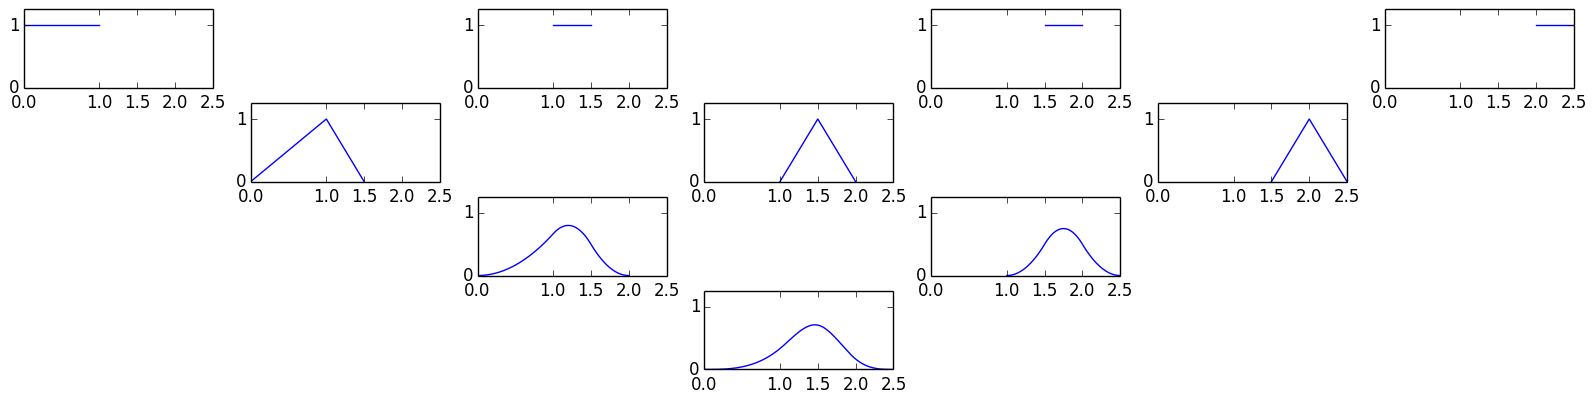

In [3]:
Curves.plottable(b)

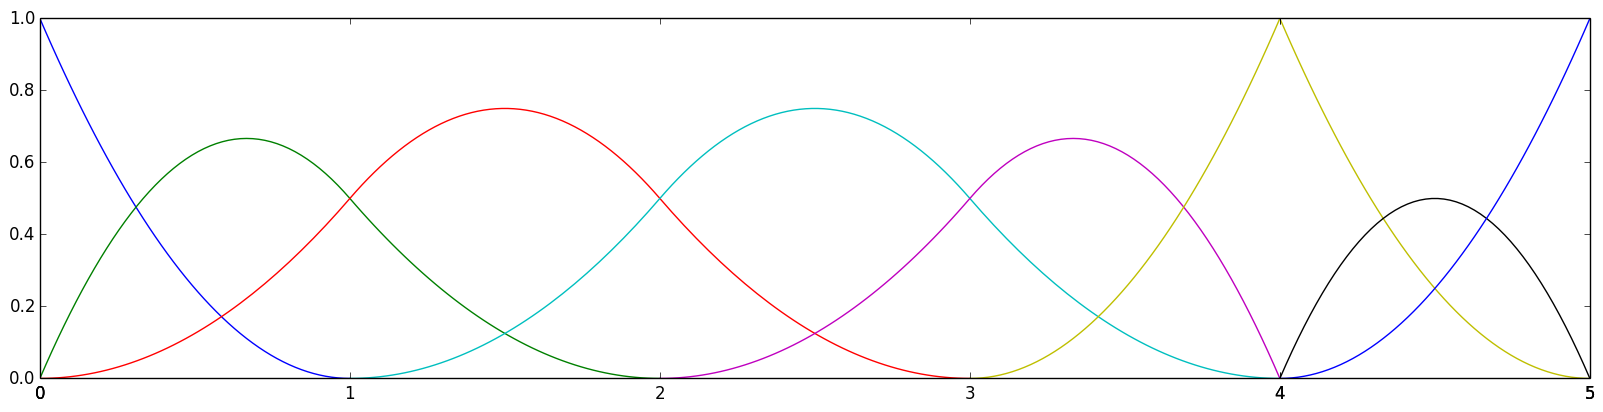

In [4]:
# definition spline space
p   = 2
kts = buildvector([0.0,1.0,2.0,3.0,4.0,5.0],[3,1,1,1,2,3])
B   = [BsplineBasisFun(kts[k:k+p+1]) for k in 1:dimsplinespace(p,kts)]

# plot basis functions
figure("B-spline basis",figsize=(20,4.5))
plot(B,50); xticks(kts);

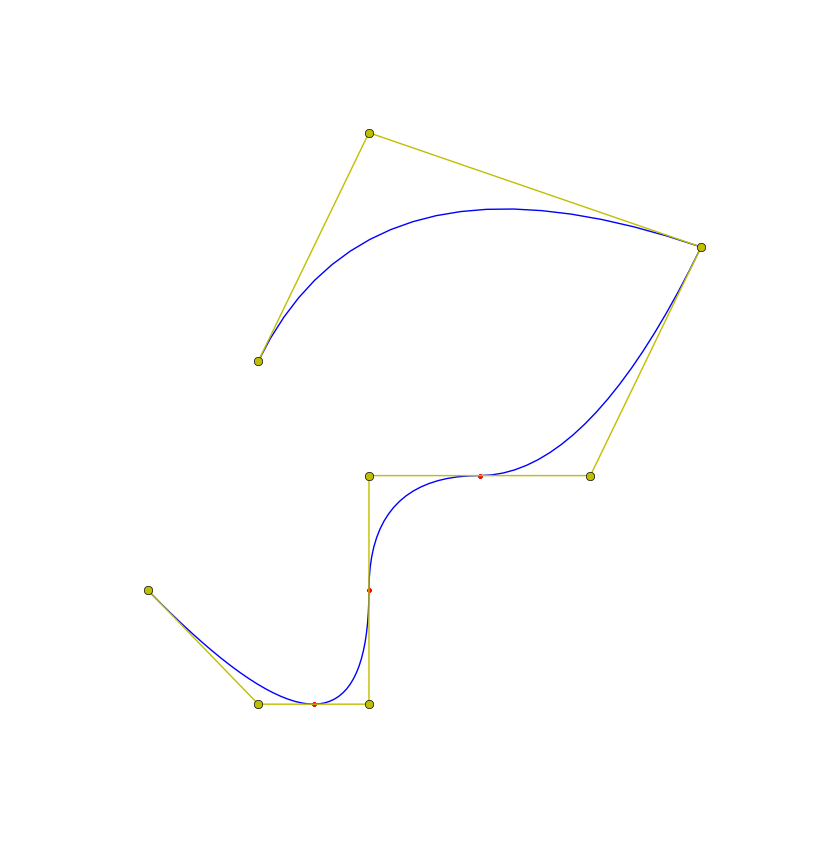

(-1.0,6.0,-1.0,6.0)

In [5]:
# build B-spline curve
X   = [0.0,1.0,2.0,2.0,4.0,5.0,2.0,1.0]
Y   = [1.0,0.0,0.0,2.0,2.0,4.0,5.0,3.0]
C   = Curve(p,kts,[X Y])

figure("B-spline Curve",figsize=(10,10))
plot(C,20,"on","on"); xlim([-1,6]); ylim([-1,6]); axis("off")

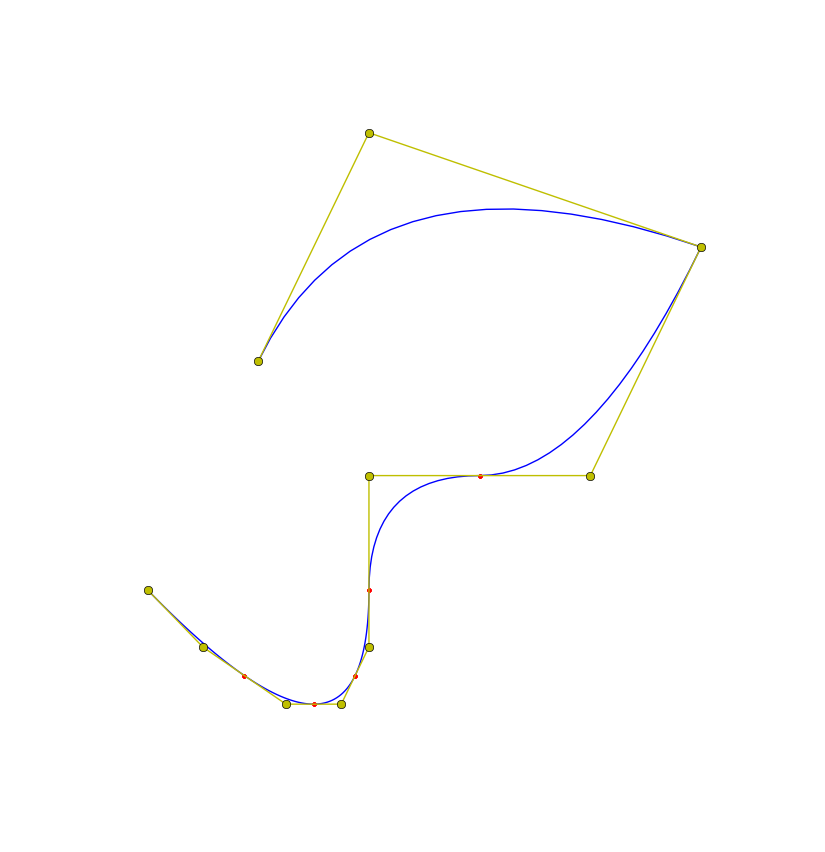

(-1.0,6.0,-1.0,6.0)

In [6]:
# build B-spline curve
p   = 2
kts = buildvector([0.0,1.0,2.0,3.0,4.0,5.0],[3,1,1,1,2,3])
X   = [0.0,1.0,2.0,2.0,4.0,5.0,2.0,1.0]
Y   = [1.0,0.0,0.0,2.0,2.0,4.0,5.0,3.0]
C   = Curve(p,kts,[X Y])

# insert a couple of knots
Curves.knotinsertion!(C,[0.5,1.5])

# plot curve
figure("B-spline Curve",figsize=(10,10))
plot(C,20,"on","on"); xlim([-1,6]); ylim([-1,6]); axis("off")

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x319cee390>)

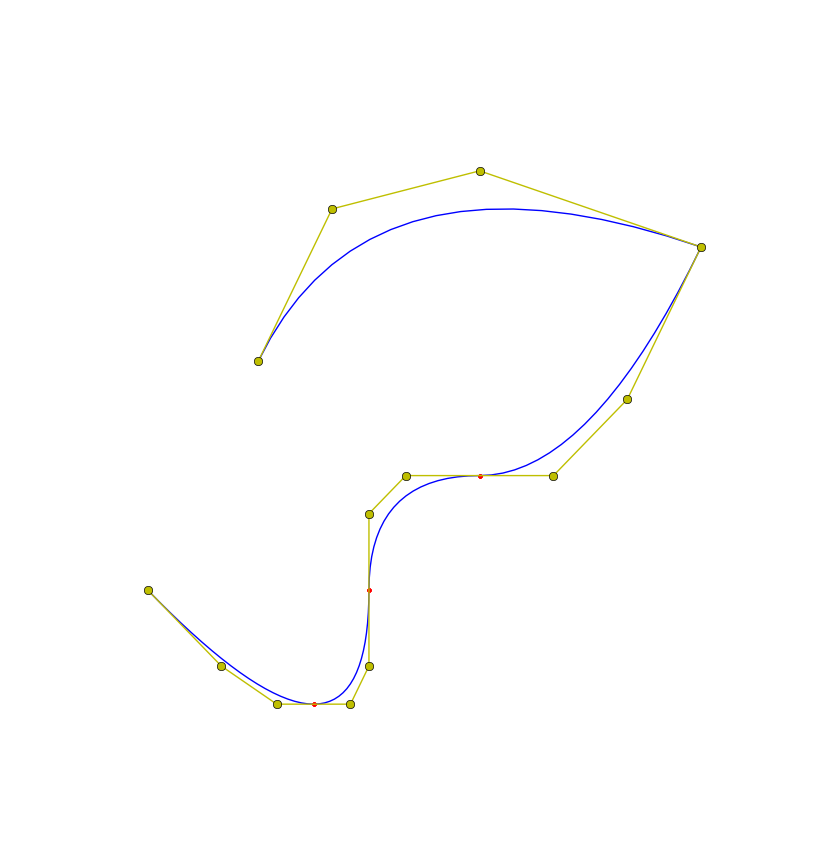

(-1.0,6.0,-1.0,6.0)

In [7]:
# build B-spline curve
p   = 2
kts = buildvector([0.0,1.0,2.0,3.0,4.0,5.0],[3,1,1,1,2,3])
X   = [0.0,1.0,2.0,2.0,4.0,5.0,2.0,1.0]
Y   = [1.0,0.0,0.0,2.0,2.0,4.0,5.0,3.0]
C   = Curve(p,kts,[X Y])

# insert a couple of knots
Curves.degreeelevate!(C,1)

# plot curve
clf()
figure("B-spline Curve",figsize=(10,10))
plot(C,20,"on","on"); xlim([-1,6]); ylim([-1,6]); axis("off")

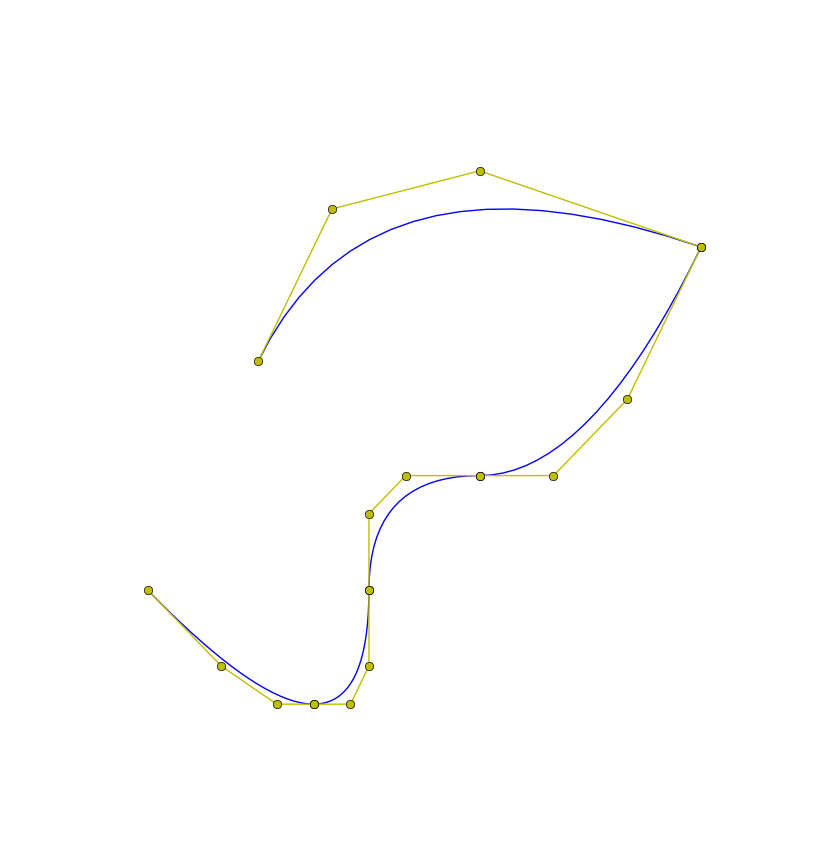

(-1.0,6.0,-1.0,6.0)

In [10]:
D = Curves.decompose(C)

figure("B-spline Curve",figsize=(10,10))
[plot(D[k],20,"on","on") for k in 1:length(D)]; xlim([-1,6]); ylim([-1,6]); axis("off")